In [1]:
#Quick setup 

import pandas as pd
import matplotlib.pyplot as plt

orders = pd.read_csv("data/fct_orders_daily.csv", parse_dates=["order_date"])
ret = pd.read_csv("data/fct_user_retention_rates.csv")


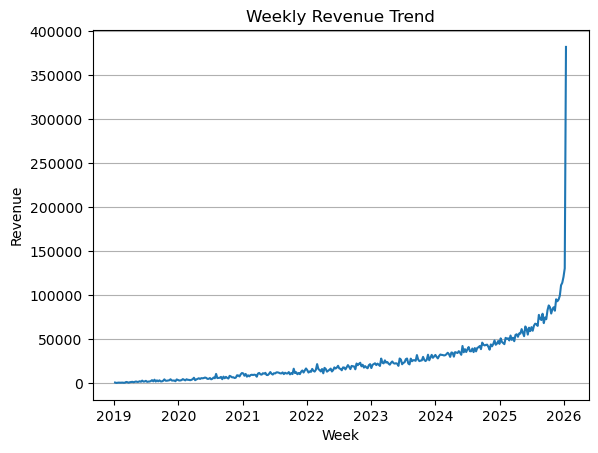

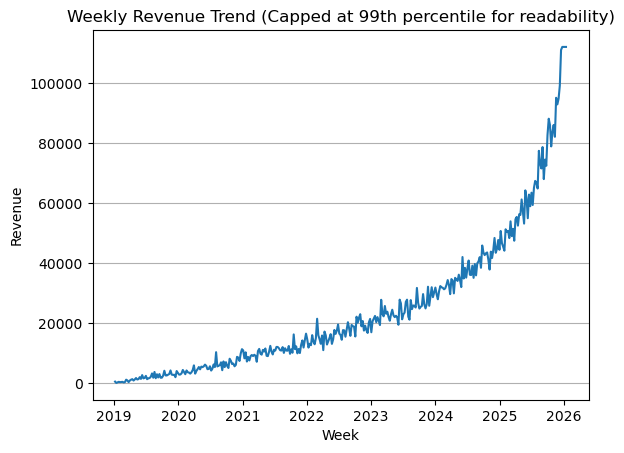

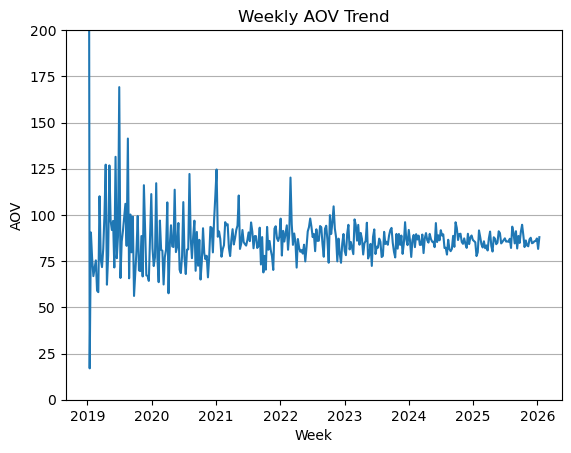

In [ ]:
orders_sorted = orders.sort_values("order_date").copy()
orders_sorted["week"] = orders_sorted["order_date"].dt.to_period("W").dt.start_time

weekly = orders_sorted.groupby("week", as_index=False).agg(
    revenue=("revenue", "sum"),
    orders=("orders", "sum"),
    items_sold=("items_sold", "sum")
)
weekly["aov"] = weekly["revenue"] / weekly["orders"]

plt.figure()
plt.plot(weekly["week"], weekly["revenue"])
plt.title("Weekly Revenue Trend")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.grid(axis= 'y')
plt.savefig("")
plt.show()

rev_cap = weekly["revenue"].quantile(0.99)
weekly_plot = weekly.copy()
weekly_plot["revenue"] = weekly_plot["revenue"].clip(upper=rev_cap)

plt.figure()
plt.plot(weekly_plot["week"], weekly_plot["revenue"])
plt.title("Weekly Revenue Trend (Capped at 99th percentile for readability)")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.grid(axis = 'y')
plt.show()


plt.figure()
plt.plot(weekly["week"], weekly["aov"])
plt.title("Weekly AOV Trend")
plt.xlabel("Week")
plt.ylabel("AOV")
plt.ylim(0, 200)
plt.grid(axis = 'y')
plt.show()



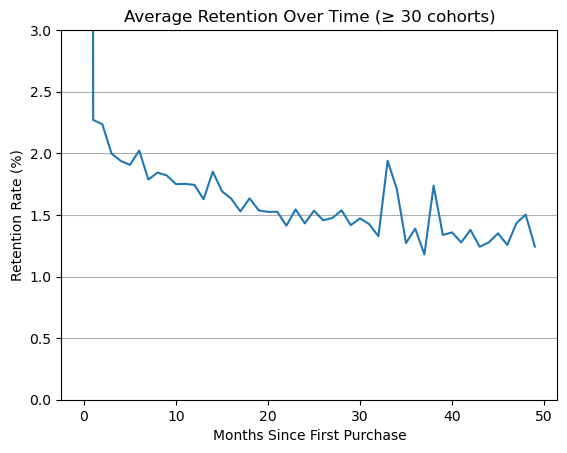

<Figure size 640x480 with 0 Axes>

In [32]:
# How many cohorts contribute to each month_number?
cohort_contrib = (
    ret.groupby("month_number", as_index=False)
       .agg(
           avg_retention=("retention_rate", "mean"),
           cohorts=("cohort_month", "nunique")
       )
)

# Keep only months with enough cohort support (tweak threshold if you want)
MIN_COHORTS = 30
filtered = cohort_contrib[cohort_contrib["cohorts"] >= MIN_COHORTS]

plt.figure()
plt.plot(filtered["month_number"], filtered["avg_retention"] * 100)
plt.title(f"Average Retention Over Time (≥ {MIN_COHORTS} cohorts)")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Retention Rate (%)")
plt.ylim(0, 3)
plt.grid(axis ='y')
plt.show()
plt.savefig('assets/average_retentation')




## Executive Insights

- Revenue shows steady long-term growth, while AOV remains relatively stable, suggesting growth is primarily volume-driven.
- Short-term volatility in daily revenue indicates sensitivity to demand fluctuations rather than pricing changes.
- Retention drops sharply after the first month, with a long tail of low but stable repeat activity.
- Later cohorts (2025–2026) are significantly larger, indicating successful user acquisition but not necessarily improved retention.
- The biggest growth lever is improving early repeat behavior (month 1–2), not increasing AOV.
